# Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты


In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


### Загрузите файл HR.csv в pandas dataframe

In [2]:
url='https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.

In [6]:
scale_col = ['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

Text(0.5, 1.0, 'Матрица корреляций')

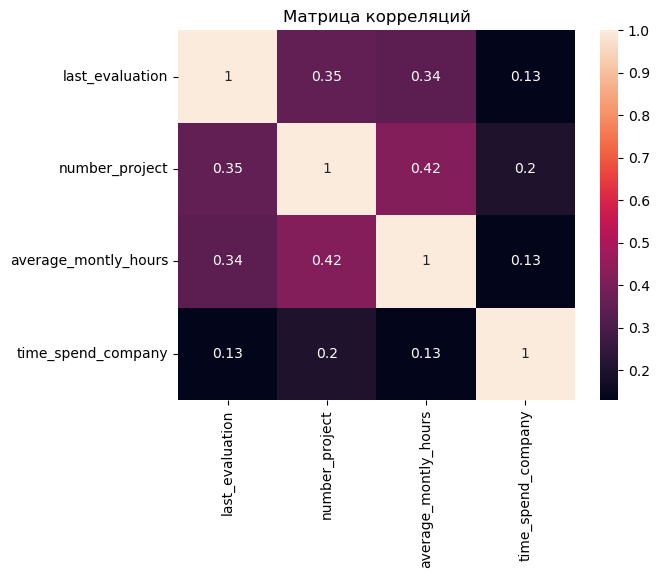

In [7]:
sns.heatmap(
    df[scale_col].corr().round(2), 
    annot=True)
plt.title('Матрица корреляций')

### Определите две самые скоррелированные и две наименее скоррелированные переменные.

1. Самые скоррелированные `number_project` и `average_montly_hours`
2. Наименее скоррелированные `average_montly_hours` и `time_spend_company`

### Рассчитайте сколько сотрудников работает в каждом департаменте.

In [8]:
df.loc[df['left'] != 0, 'department'].value_counts()

department
sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: count, dtype: int64

### Показать распределение сотрудников по зарплатам. 

[Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')]

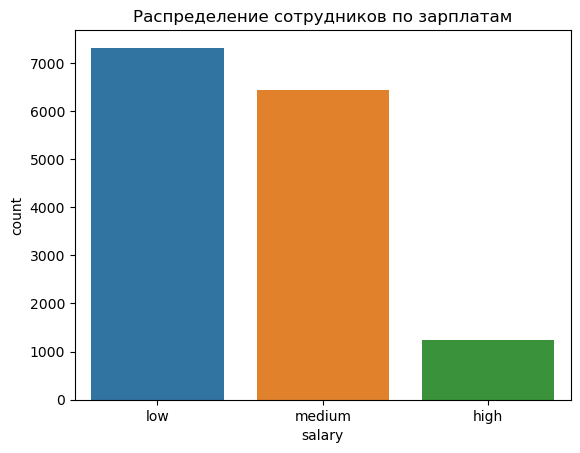

In [9]:
sns.countplot(df, x ='salary').set(title='Распределение сотрудников по зарплатам')

### Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

[Text(0.5, 1.0, 'Распределение сотрудников по департаментам и зарплатам')]

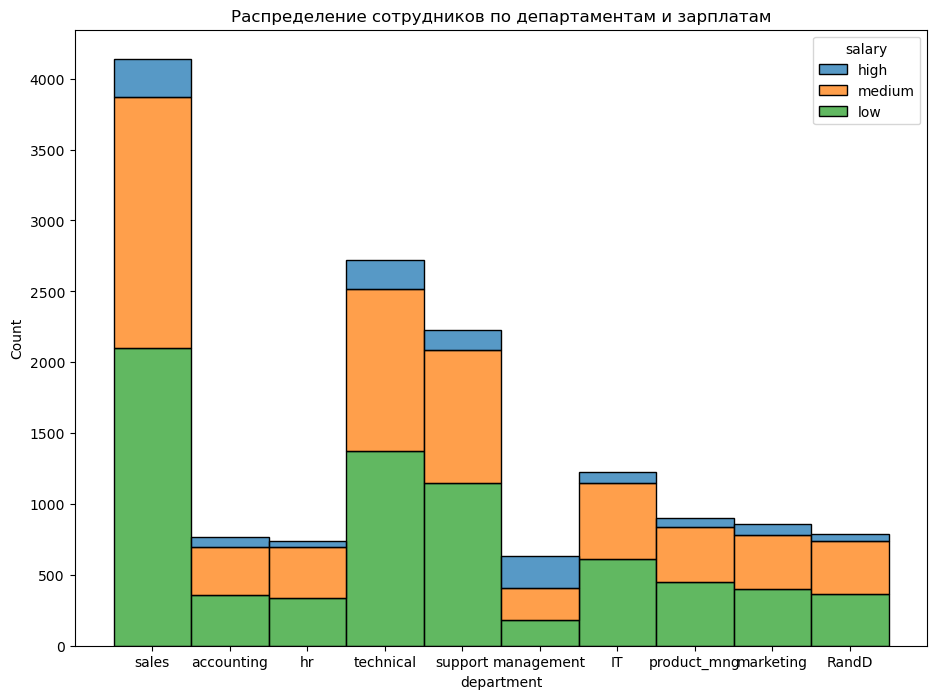

In [26]:
plt.figure(figsize=(11,8))

sns.histplot(
    df,
    x ='department',
    hue = 'salary',
    multiple="stack",
    hue_order=['high', 'medium', 'low']
).set(title='Распределение сотрудников по департаментам и зарплатам')


### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


In [30]:
df_low = df[(df['salary'] == 'low') & (df['left']) == 0]['average_montly_hours']
df_high = df[(df['salary'] == 'high') & (df['left']) == 0]['average_montly_hours']


In [34]:
st.shapiro(df_low), st.shapiro(df_high)

/Users/vadim/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.9711353182792664, pvalue=1.401298464324817e-44),
 ShapiroResult(statistic=0.9637584090232849, pvalue=0.0))

Данные распределены нормально, будем использовать t-тест для независмых выборок

In [35]:
stat, p = st.ttest_ind(df_low, df_high)
stat, p

(-1.6800337728737114, 0.09296200410681121)

Тест не подтверждает, что более высокооплачиваемые сотрудники работают больше

### Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [66]:
df.pivot_table(
    aggfunc={
        'number_project': 'mean',
        'satisfaction_level': 'mean',
        'promotion_last_5years': lambda x: len(x)/len(df)},
    index='left',
    values=['number_project', 'satisfaction_level', 'promotion_last_5years'],
    )

,number_project,promotion_last_5years,satisfaction_level
left,,,
0,3.786664,0.761917,0.666810
1,3.855503,0.238083,0.440098


### LDA
- Разделить данные на тестовую и обучающую выборки
- Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
- Оценить качество модели на тестовой выборки

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['left', 'department', 'salary'], axis=1),
    df['left'],
    test_size=0.20
)

In [71]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [75]:
def print_all_metrics(y_test, y_pred, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_test, y_pred)))

In [76]:
print_all_metrics(y_test, lda.predict(X_test) )

Метрики классификации
	Accuracy: 0.76
	Precision: 0.48
	Recall: 0.24
	F1: 0.32


Модель в целом неплохо предсказывает класс.

Однако доля прогнозируемого увольнения оставляет желать лучшего
